# 🍽️ Recipe Review Classification Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('Recipe Reviews and User Feedback Dataset.csv')

# Show initial info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [3]:
# Drop rows with 0 stars (no rating)
df = df[df['stars'] > 0]

# Drop irrelevant columns
drop_columns = ['Unnamed: 0', 'recipe_name', 'recipe_code', 'comment_id', 'user_id',
                'user_name', 'created_at', 'text']
df = df.drop(columns=drop_columns)

# Confirm updated dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16486 entries, 0 to 18181
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   recipe_number    16486 non-null  int64
 1   user_reputation  16486 non-null  int64
 2   reply_count      16486 non-null  int64
 3   thumbs_up        16486 non-null  int64
 4   thumbs_down      16486 non-null  int64
 5   stars            16486 non-null  int64
 6   best_score       16486 non-null  int64
dtypes: int64(7)
memory usage: 1.0 MB


,recipe_number,user_reputation,reply_count,thumbs_up,thumbs_down,stars,best_score
0,1,1,0,0,0,5,527
1,1,50,0,7,0,5,724
2,1,10,0,3,0,5,710
5,1,1,0,3,1,5,518
6,1,1,0,11,0,5,833


/var/folders/4y/rcqh5h6941d8_km_12_j1kd80000gq/T/ipykernel_1556/1751681281.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=df, palette='Set2')


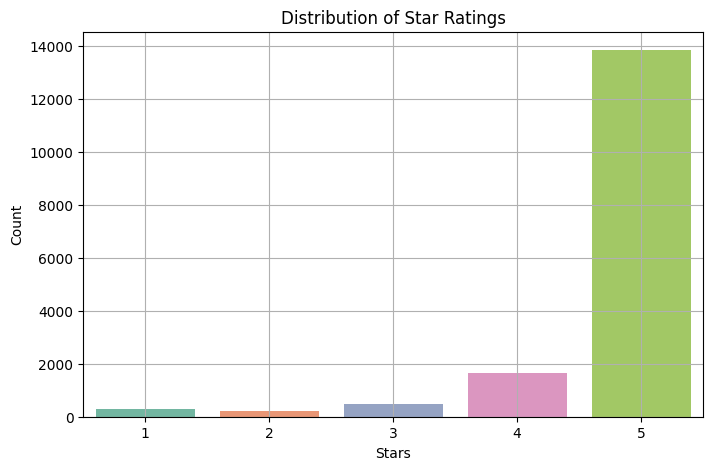

In [4]:
# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='stars', data=df, palette='Set2')
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [5]:
# Define features and target
X = df.drop(columns=['stars'])
y = df['stars']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

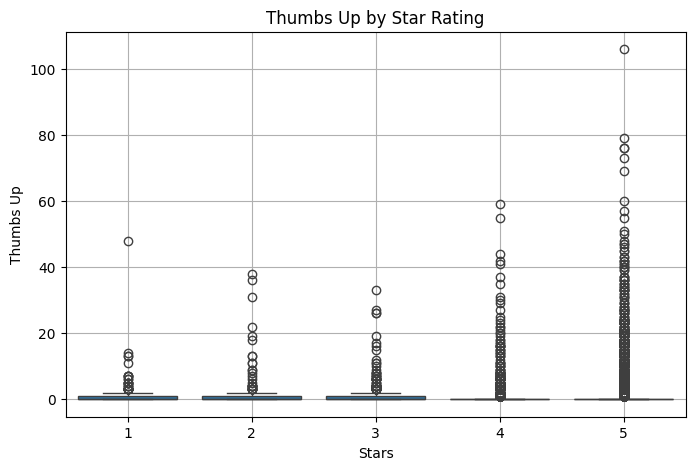

In [6]:
# Scatter plot: thumbs_up vs stars
plt.figure(figsize=(8, 5))
sns.boxplot(x=y, y=df['thumbs_up'])
plt.title('Thumbs Up by Star Rating')
plt.xlabel('Stars')
plt.ylabel('Thumbs Up')
plt.grid(True)
plt.show()

              precision    recall  f1-score   support

           1       0.33      0.12      0.17        59
           2       0.00      0.00      0.00        40
           3       0.05      0.01      0.02        90
           4       0.13      0.01      0.03       336
           5       0.85      0.98      0.91      2773

    accuracy                           0.83      3298
   macro avg       0.27      0.23      0.23      3298
weighted avg       0.74      0.83      0.77      3298



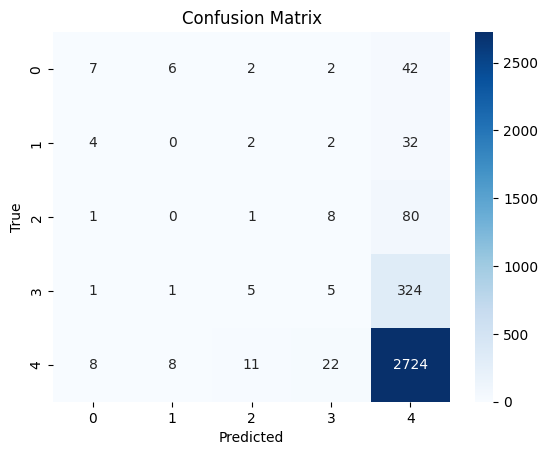

In [7]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/var/folders/4y/rcqh5h6941d8_km_12_j1kd80000gq/T/ipykernel_1556/3865138059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stars', y='reply_count', data=df, palette='Set3')


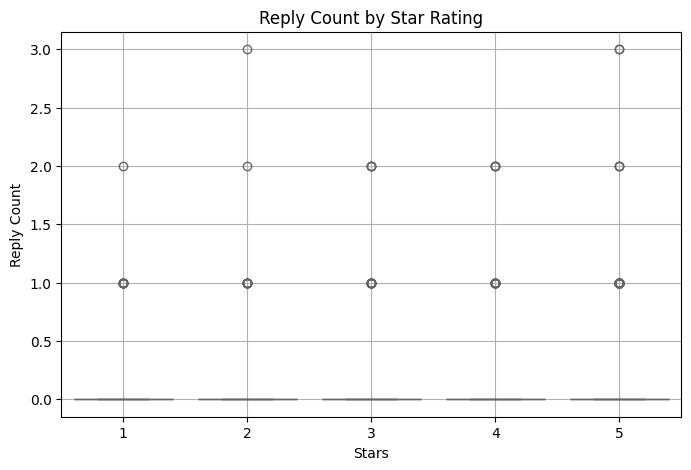

In [8]:
# Visualize reply_count by star rating
plt.figure(figsize=(8, 5))
sns.boxplot(x='stars', y='reply_count', data=df, palette='Set3')
plt.title('Reply Count by Star Rating')
plt.xlabel('Stars')
plt.ylabel('Reply Count')
plt.grid(True)
plt.show()


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute macro-averaged scores for reporting
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Macro Precision: {precision:.2f}")
print(f"Macro Recall: {recall:.2f}")
print(f"Macro F1 Score: {f1:.2f}")


Classification Report:
              precision    recall  f1-score   support

           1       0.33      0.12      0.17        59
           2       0.00      0.00      0.00        40
           3       0.05      0.01      0.02        90
           4       0.13      0.01      0.03       336
           5       0.85      0.98      0.91      2773

    accuracy                           0.83      3298
   macro avg       0.27      0.23      0.23      3298
weighted avg       0.74      0.83      0.77      3298

Accuracy: 0.83
Macro Precision: 0.27
Macro Recall: 0.23
Macro F1 Score: 0.23
